cell 1 
# Titanic Dataset – Exploratory Data Analysis (EDA)

This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset to identify patterns, trends, and relationships that influenced passenger survival.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [7]:
df= pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Univariate Analysis

Univariate analysis focuses on analyzing individual variables to understand their distribution and characteristics.


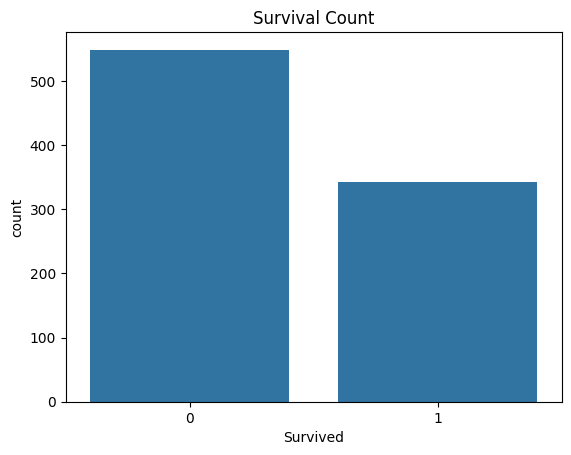

In [12]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

**Observation:**  
The number of non-survivors is higher than survivors, indicating an imbalanced target variable.


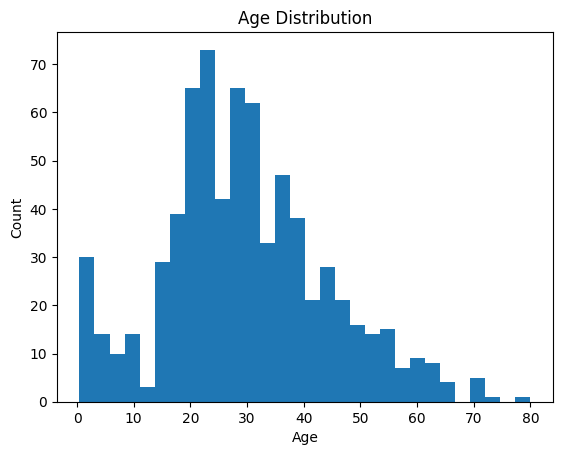

In [13]:
plt.hist(df['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


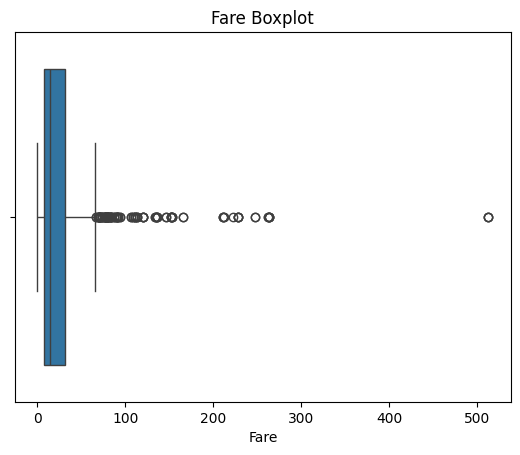

In [14]:
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.show()


## Bivariate Analysis

Bivariate analysis examines relationships between two variables, particularly survival and other features.


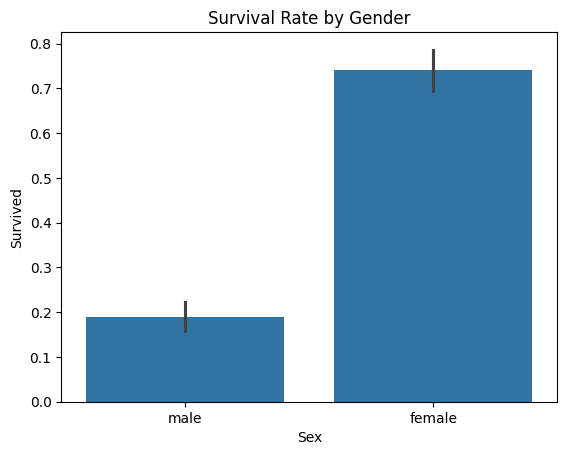

In [15]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


**Observation:**  
Female passengers had a significantly higher survival rate compared to males, suggesting gender was a strong survival factor.


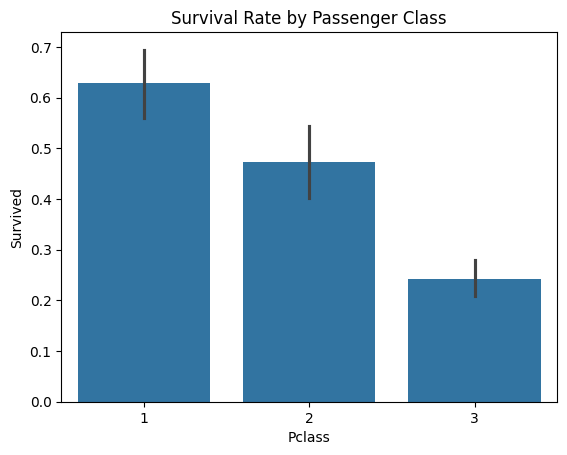

In [16]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


**Observation:**  
Passengers in first class showed much higher survival rates than those in third class, highlighting the impact of socio-economic status.


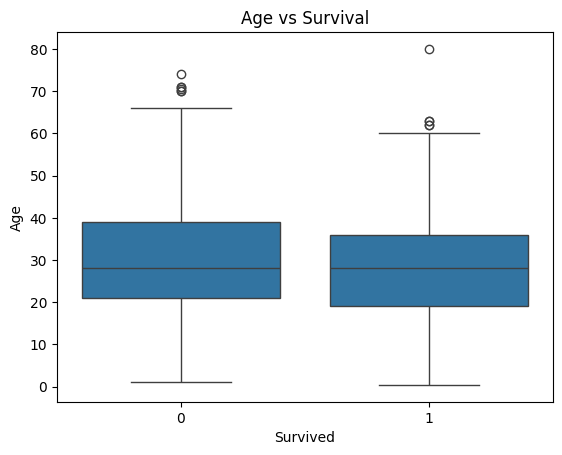

In [17]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()


## Multivariate Analysis

Multivariate analysis helps identify correlations among numerical variables.


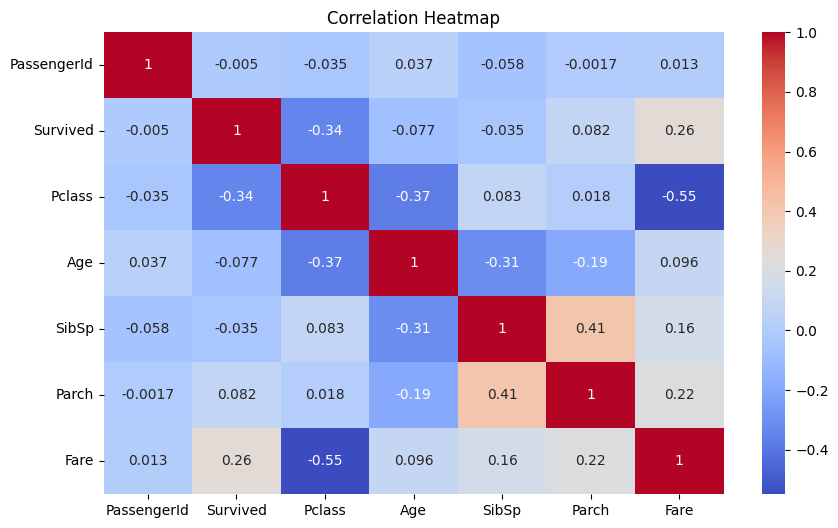

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Observation:**  
Fare shows a positive correlation with survival, while passenger class is negatively correlated, indicating wealthier passengers had better chances of survival.


## Summary of Insights

- Female passengers had a significantly higher survival rate than males.
- Passengers in higher classes (Pclass 1) were more likely to survive.
- Fare shows a positive correlation with survival, indicating wealthier passengers had better chances.
- Age had missing values and showed moderate influence on survival.
- The dataset contains skewness in Fare and missing data in Age and Cabin columns.
